In [21]:
import pandas as pd
import os
 
folder = "data/monthly_sales"
all_months = []
 
for file in os.listdir(folder):
    if file.endswith(".csv"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["month"] = file.split(".")[0]
        all_months.append(df)
 
sales_df = pd.concat(all_months, ignore_index=True)


In [22]:
print(sales_df)


   transaction_id  product_id   department  units_sold  revenue month
0            T001         101  Electronics           5   1250.0   jan
1            T002         102    Furniture           2    800.0   jan
2            T003         103     Clothing          10    500.0   jan
3            T004         104         Toys           3    150.0   jan
4            T005         105  Electronics           1    300.0   jan
5            T011         101  Electronics           8   2000.0   mar
6            T012         106    Furniture           3   1200.0   mar
7            T013         108     Clothing          20   1000.0   mar
8            T014         104         Toys           4    200.0   mar
9            T015         105  Electronics           2    600.0   mar
10           T006         101  Electronics           6   1500.0   feb
11           T007         106    Furniture           1    400.0   feb
12           T008         107     Clothing          15    750.0   feb
13           T009   

In [23]:
sales_df.dropna(subset=['revenue'], inplace=True)
sales_df.columns = sales_df.columns.str.strip().str.lower()


In [24]:
print(sales_df)

   transaction_id  product_id   department  units_sold  revenue month
0            T001         101  Electronics           5   1250.0   jan
1            T002         102    Furniture           2    800.0   jan
2            T003         103     Clothing          10    500.0   jan
3            T004         104         Toys           3    150.0   jan
4            T005         105  Electronics           1    300.0   jan
5            T011         101  Electronics           8   2000.0   mar
6            T012         106    Furniture           3   1200.0   mar
7            T013         108     Clothing          20   1000.0   mar
8            T014         104         Toys           4    200.0   mar
9            T015         105  Electronics           2    600.0   mar
10           T006         101  Electronics           6   1500.0   feb
11           T007         106    Furniture           1    400.0   feb
12           T008         107     Clothing          15    750.0   feb
13           T009   

In [25]:
products_df = pd.read_csv("data/products.csv")
merged_df = sales_df.merge(products_df, on="product_id", how="left")


In [26]:
merged_df["revenue_per_unit"] = merged_df["revenue"] / merged_df["units_sold"]

In [10]:
merged_df = merged_df[merged_df["units_sold"] > 0]

In [27]:
pd.set_option('display.max_columns', None) 
print(merged_df)

   transaction_id  product_id   department  units_sold  revenue month  \
0            T001         101  Electronics           5   1250.0   jan   
1            T002         102    Furniture           2    800.0   jan   
2            T003         103     Clothing          10    500.0   jan   
3            T004         104         Toys           3    150.0   jan   
4            T005         105  Electronics           1    300.0   jan   
5            T011         101  Electronics           8   2000.0   mar   
6            T012         106    Furniture           3   1200.0   mar   
7            T013         108     Clothing          20   1000.0   mar   
8            T014         104         Toys           4    200.0   mar   
9            T015         105  Electronics           2    600.0   mar   
10           T006         101  Electronics           6   1500.0   feb   
11           T007         106    Furniture           1    400.0   feb   
12           T008         107     Clothing         

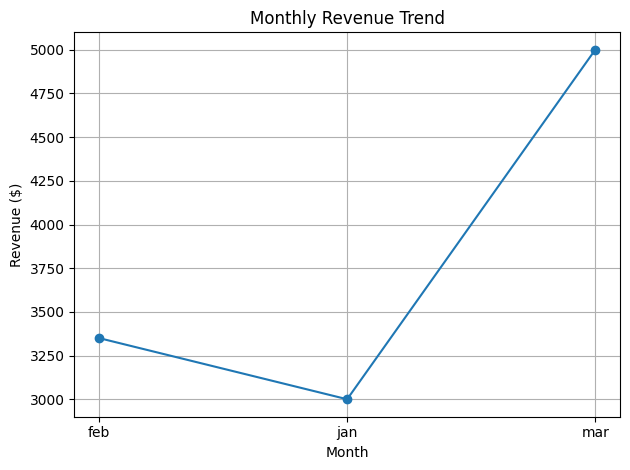

In [28]:
import os

monthly = merged_df.groupby("month")["revenue"].sum().reset_index()
monthly.sort_values("month", inplace=True)
 
import matplotlib.pyplot as plt
 
plt.plot(monthly["month"], monthly["revenue"], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()

# Create the 'outputs' directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Then save the plot
plt.savefig("outputs/revenue_trend.png")




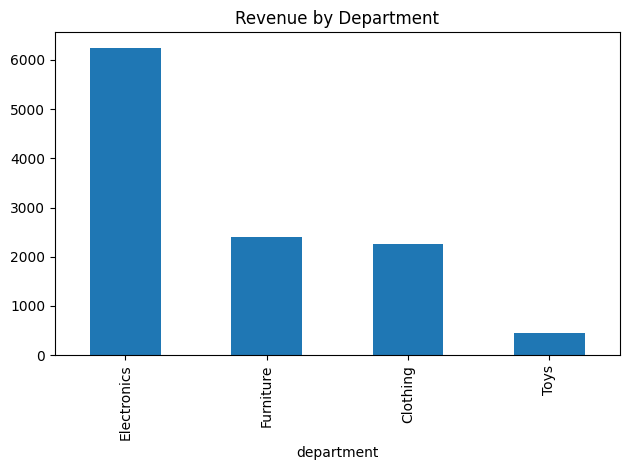

In [29]:
dept_perf = merged_df.groupby("department")["revenue"].sum().sort_values(ascending=False)
dept_perf.plot(kind="bar", title="Revenue by Department")
plt.tight_layout()



In [30]:
from fpdf import FPDF
 
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, "Retail Sales Summary", ln=True, align='C')
 
pdf.cell(200, 10, "Top-performing Departments: Electronics, Home Goods", ln=True)
pdf.image("outputs/revenue_trend.png", x=10, y=40, w=180)
 
pdf.output("outputs/final_report.pdf")


''

In [31]:
pip install fpdf


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
monthly.to_csv("outputs/monthly_summary.csv", index=False)

In [ ]:
!streamlit run dashboard/app.py 


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.0.0.139:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
